Fashion Classification
- Using grayscale image data. each color has value between 0 and 255. 0 is black and 255 is white
- 28 x 28 pixel images
- we have to classify 70,000 image data into 10 categories - sneakers, shorts, ankle boots etc.
### 10 classes decoding is as follows:
0 T-shirt/ Top
1 Trouser
2 Pullover
3 Dress
4 Coat
5 Sandal
6 SHirt
7 Sneaker
8 Bag
9 Ankle boot


##  Step 1 Importing the data

In [1]:
#Importing the libraries
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [2]:
fashion_train_df = pd.read_csv('fashion-mnist_train.csv',sep = ',') #has 60,000 rows
fashion_test_df = pd.read_csv('fashion-mnist_test.csv',sep = ',') #has 10,000 rows

In [3]:
fashion_train_df

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59996,1,0,0,0,0,0,0,0,0,0,...,73,0,0,0,0,0,0,0,0,0
59997,8,0,0,0,0,0,0,0,0,0,...,160,162,163,135,94,0,0,0,0,0
59998,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Step 2 Visualizing the data

In [4]:
fashion_train_df.shape

(60000, 785)

In [6]:
training = np.array(fashion_train_df,dtype = 'float32')
testing = np.array(fashion_test_df,dtype = 'float32')

0.0

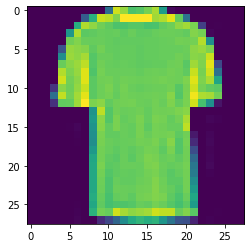

In [7]:
i = random.randint(0,60000)
plt.imshow(training[i,1:].reshape(28,28))
label = training[i,0]
label

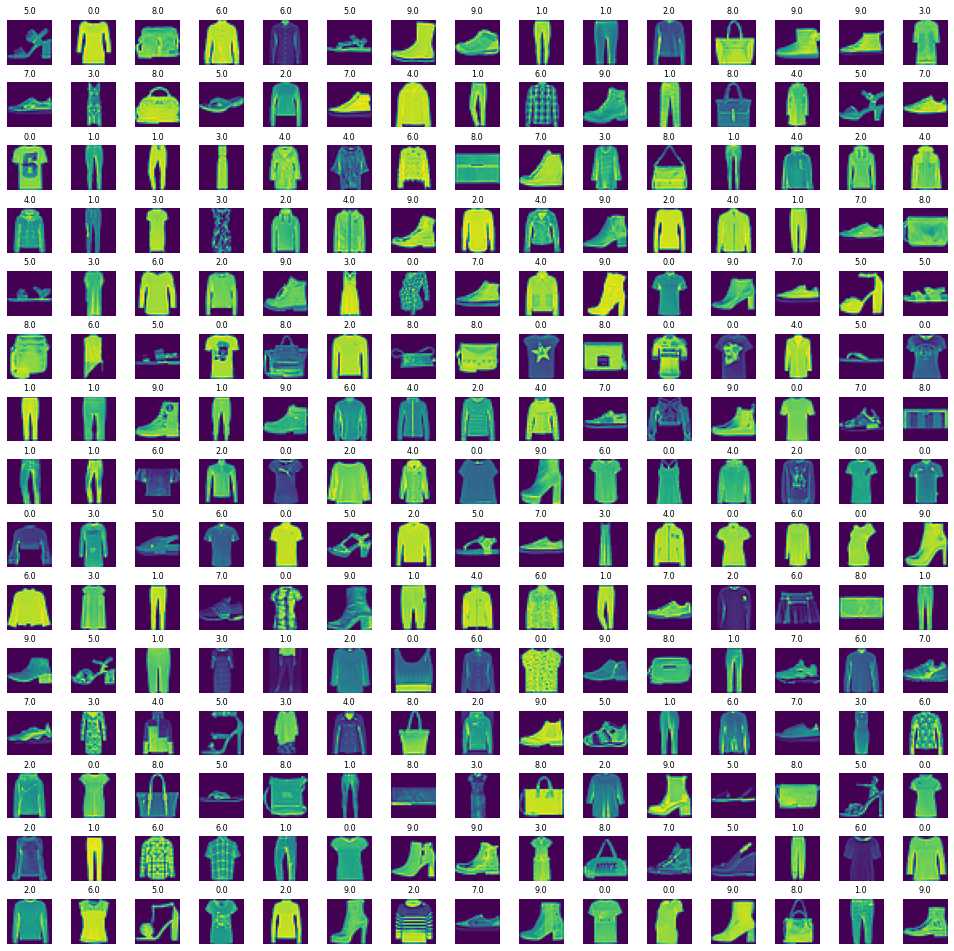

In [8]:
# Let's view more images in a grid format
# Define the dimensions of the grid plot
W_grid = 15
L_grid = 15

# fig, axes = plt.subplot(L_grid,W_grid)
#subplot return figure object and axes object

fig, axes = plt.subplots(L_grid, W_grid, figsize = (17,17))

axes = axes.ravel() #flatten the 15 x 15 matrix into 225 array

n_training = len(training) # get the length of training dataset

# Select a random number from 0 to n_training
for i in np.arange(0, W_grid * L_grid): # create evenly spaces variables 

    # Select a random number
    index = np.random.randint(0, n_training)
    # read and display an image with the selected index    
    axes[i].imshow( training[index,1:].reshape((28,28)) )
    axes[i].set_title(training[index,0], fontsize = 8)
    axes[i].axis('off')

plt.subplots_adjust(hspace=0.4)


In [11]:
## Replacing all the labels wih their name tags
# Process followed - Convert the array into dataframe and replace the values using a dictionary. After that convert that dataframe into array
#training_df = pd.DataFrame(training)
training_df[0].replace({0 : 'T-shirt/top',1 : 'Trouser', 2 : 'Pullover', 3 : 'Dress', 4 : 'Coat', 5 : 'Sandal', 6 : 'Shirt', 7 : 'Sneaker', 8 : 'Bag', 9 : 'Ankle boot'}, inplace=True)
tryy = training.astype(object)
tryy[:,0] = np.array(training_df[0])
tryy

array([['Pullover', 0.0, 0.0, ..., 0.0, 0.0, 0.0],
       ['Ankle boot', 0.0, 0.0, ..., 0.0, 0.0, 0.0],
       ['Shirt', 0.0, 0.0, ..., 0.0, 0.0, 0.0],
       ...,
       ['Bag', 0.0, 0.0, ..., 0.0, 0.0, 0.0],
       ['Bag', 0.0, 0.0, ..., 0.0, 0.0, 0.0],
       ['Sneaker', 0.0, 0.0, ..., 0.0, 0.0, 0.0]], dtype=object)

## Step 3 Training the data

In [12]:
X_train = training[:,1:]/255
y_train = training[:,0]
X_test = testing[:,1:]/255
y_test = testing[:,0]

In [13]:
from sklearn.model_selection import train_test_split

X_train, X_validate, y_train, y_validate = train_test_split(X_train, y_train, test_size = 0.2, random_state = 12345)

In [14]:
X_train.shape

(48000, 784)

In [15]:
# * unpack the tuple
X_train = X_train.reshape(X_train.shape[0], *(28, 28, 1))
X_test = X_test.reshape(X_test.shape[0], *(28, 28, 1))
X_validate = X_validate.reshape(X_validate.shape[0], *(28, 28, 1))

In [16]:
X_train.shape

(48000, 28, 28, 1)

In [17]:
X_test.shape

(10000, 28, 28, 1)

In [18]:
X_validate.shape

(12000, 28, 28, 1)

In [19]:
import keras # open source Neural network library 

# y_train = keras.utils.to_categorical(y_train, 10)
# y_test = keras.utils.to_categorical(y_test, 10)
# Import train_test_split from scikit library
# Import Keras

from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from keras.optimizers import Adam
from keras.callbacks import TensorBoard



Using TensorFlow backend.


In [20]:
cnn_model = Sequential()

# Try 32 fliters first then 64
cnn_model.add(Conv2D(64,3, 3, input_shape = (28,28,1), activation='relu'))
cnn_model.add(MaxPooling2D(pool_size = (2, 2)))

cnn_model.add(Dropout(0.25))

# cnn_model.add(Conv2D(32,3, 3, activation='relu'))
# cnn_model.add(MaxPooling2D(pool_size = (2, 2)))

cnn_model.add(Flatten())
cnn_model.add(Dense(output_dim = 32, activation = 'relu'))
cnn_model.add(Dense(output_dim = 10, activation = 'sigmoid'))


C:\Users\ermeg\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), input_shape=(28, 28, 1..., activation="relu")`
  after removing the cwd from sys.path.
C:\Users\ermeg\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=32)`
  del sys.path[0]
C:\Users\ermeg\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=10)`
  


In [21]:
cnn_model.compile(loss ='sparse_categorical_crossentropy', optimizer=Adam(lr=0.001),metrics =['accuracy'])

In [22]:
epochs = 50

history = cnn_model.fit(X_train,
                        y_train,
                        batch_size = 512,
                        nb_epoch = epochs,
                        verbose = 1,
                        validation_data = (X_validate, y_validate))



C:\Users\ermeg\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


Train on 48000 samples, validate on 12000 samples
Epoch 1/50
48000/48000 [==============================] - 102s 2ms/step - loss: 0.8071 - accuracy: 0.7303 - val_loss: 0.4692 - val_accuracy: 0.8361
Epoch 2/50
48000/48000 [==============================] - 73s 2ms/step - loss: 0.4380 - accuracy: 0.8450 - val_loss: 0.3888 - val_accuracy: 0.8671
Epoch 3/50
48000/48000 [==============================] - 72s 2ms/step - loss: 0.3800 - accuracy: 0.8671 - val_loss: 0.3693 - val_accuracy: 0.8685
Epoch 4/50
48000/48000 [==============================] - 71s 1ms/step - loss: 0.3587 - accuracy: 0.8739 - val_loss: 0.3393 - val_accuracy: 0.8814
Epoch 5/50
48000/48000 [==============================] - 76s 2ms/step - loss: 0.3321 - accuracy: 0.8829 - val_loss: 0.3288 - val_accuracy: 0.8848
Epoch 6/50
48000/48000 [==============================] - 72s 2ms/step - loss: 0.3168 - accuracy: 0.8876 - val_loss: 0.3071 - val_accuracy: 0.8913
Epoch 7/50
48000/48000 [==============================] - 73s 2ms/s

## Step 4 Evaluating the data

In [23]:
evaluation = cnn_model.evaluate(X_test, y_test)
print('Test Accuracy : {:.3f}'.format(evaluation[1]))

10000/10000 [==============================] - 7s 689us/step
Test Accuracy : 0.919


In [24]:
# get the predictions for the test data
predicted_classes = cnn_model.predict_classes(X_test)


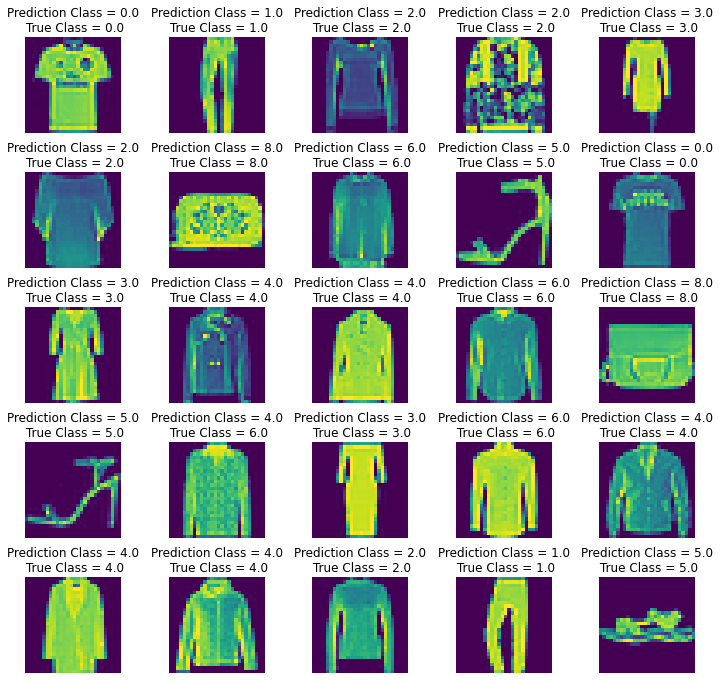

In [25]:
L = 5
W = 5
fig, axes = plt.subplots(L, W, figsize = (12,12))
axes = axes.ravel() # 

for i in np.arange(0, L * W):  
    axes[i].imshow(X_test[i].reshape(28,28))
    axes[i].set_title("Prediction Class = {:0.1f}\n True Class = {:0.1f}".format(predicted_classes[i], y_test[i]))
    axes[i].axis('off')

plt.subplots_adjust(wspace=0.5)


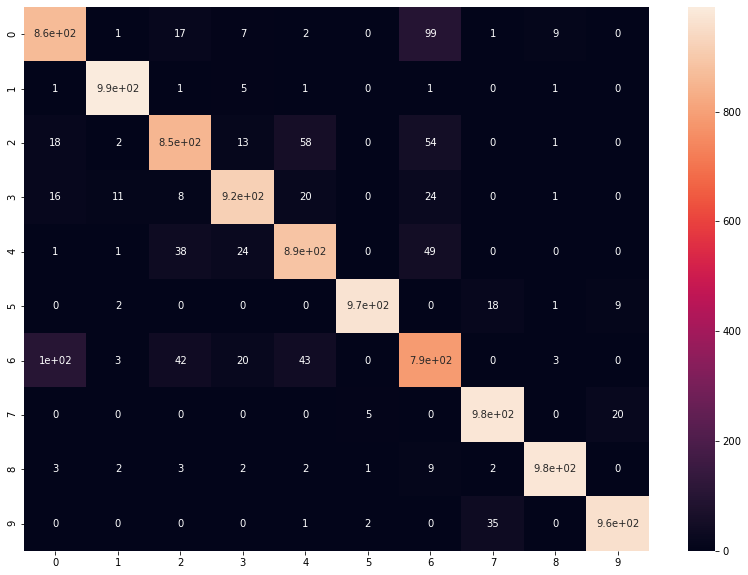

In [26]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, predicted_classes)
plt.figure(figsize = (14,10))
sns.heatmap(cm, annot=True)
# Sum the diagonal element to get the total true correct values

In [27]:
from sklearn.metrics import classification_report

num_classes = 10
target_names = ["Class {}".format(i) for i in range(num_classes)]

print(classification_report(y_test, predicted_classes, target_names = target_names))

              precision    recall  f1-score   support

     Class 0       0.86      0.86      0.86      1000
     Class 1       0.98      0.99      0.98      1000
     Class 2       0.89      0.85      0.87      1000
     Class 3       0.93      0.92      0.92      1000
     Class 4       0.87      0.89      0.88      1000
     Class 5       0.99      0.97      0.98      1000
     Class 6       0.77      0.79      0.78      1000
     Class 7       0.95      0.97      0.96      1000
     Class 8       0.98      0.98      0.98      1000
     Class 9       0.97      0.96      0.97      1000

    accuracy                           0.92     10000
   macro avg       0.92      0.92      0.92     10000
weighted avg       0.92      0.92      0.92     10000

